   #            Linear Regression Assignment (Bike Sharing) - By Vignesh

# Steps to Follow the Excercise

1. Reading, Understanding & Visualizing Data
2. Preparing Data Modelling ( train-test split , Rescalling etc)
3. Train the Models
4. Residual Analysis
4. Predection & Evaluation on Test set`

In [16]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Reading, Understanding & Visualizing Data

In [30]:
 # readng csv
 df_days = pd.read_csv('day.csv',header =0)
 df_days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Inspection

In [31]:
df_days.shape

(730, 16)

In [32]:
df_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [33]:
df_days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning


In [35]:
# checking Null Values
df_days.isnull().sum() * 100/df_days.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [90]:
# Copy dataframe
df = df_days.copy()
df.shape

(730, 16)

In [91]:
df.drop_duplicates(inplace=True)
df.shape

(730, 16)

no duplicates found shape is same for df and df_days dataframe

In [92]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [93]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [94]:
# droping unwanted columns instant , dteday, casual, registered
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [95]:
# df after droping columns
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [96]:
# Encoding/mapping the season column
df.season = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.value_counts()



fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [97]:
# Encoding/mapping the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.month.value_counts


<bound method IndexOpsMixin.value_counts of 0      jan
1      jan
2      jan
3      jan
4      jan
      ... 
725    dec
726    dec
727    dec
728    dec
729    dec
Name: month, Length: 730, dtype: object>

In [98]:
# Encoding/mapping the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weekday.value_counts

<bound method IndexOpsMixin.value_counts of 0      sat
1      sun
2      mon
3      tue
4      wed
      ... 
725    thu
726    fri
727    sat
728    sun
729    mon
Name: weekday, Length: 730, dtype: object>

In [99]:
# Encoding/mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
df.weathersit.value_counts

<bound method IndexOpsMixin.value_counts of 0      Misty
1      Misty
2      Clear
3      Clear
4      Clear
       ...  
725    Misty
726    Misty
727    Misty
728    Clear
729    Misty
Name: weathersit, Length: 730, dtype: object>

In [100]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


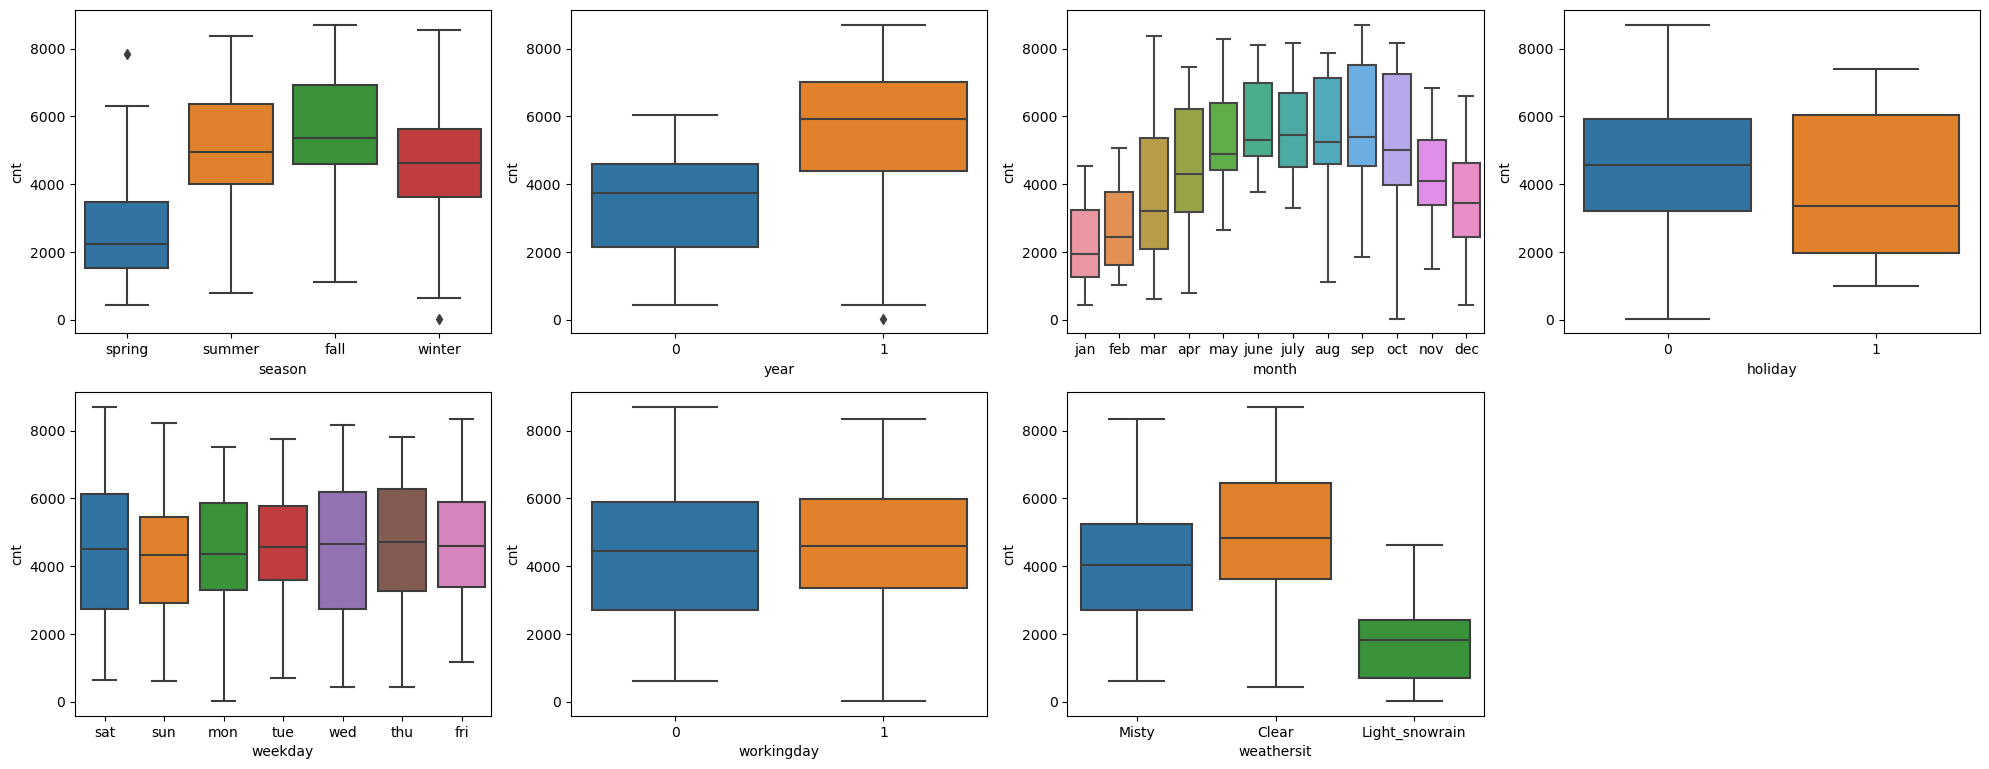

In [129]:
# Outlier Analyis, Univariate Analysis
fig, axs = plt.subplots(figsize=(20, 15))
plt.subplot(4,4,1)
plt1 =sns.boxplot(x='season', y='cnt', data =df)
plt.subplot(4,4,2)
plt2 =sns.boxplot(x='year', y='cnt', data =df)
plt.subplot(4,4,3)
plt2 =sns.boxplot(x='month', y='cnt', data =df)
plt.subplot(4,4,4)
plt2 =sns.boxplot(x='holiday', y='cnt', data =df)
plt.subplot(4,4,5)
plt2 =sns.boxplot(x='weekday', y='cnt', data =df)
plt.subplot(4,4,6)
plt2 =sns.boxplot(x='workingday', y='cnt', data =df)
plt.subplot(4,4,7)
plt2 =sns.boxplot(x='weathersit', y='cnt', data =df)

plt.tight_layout()

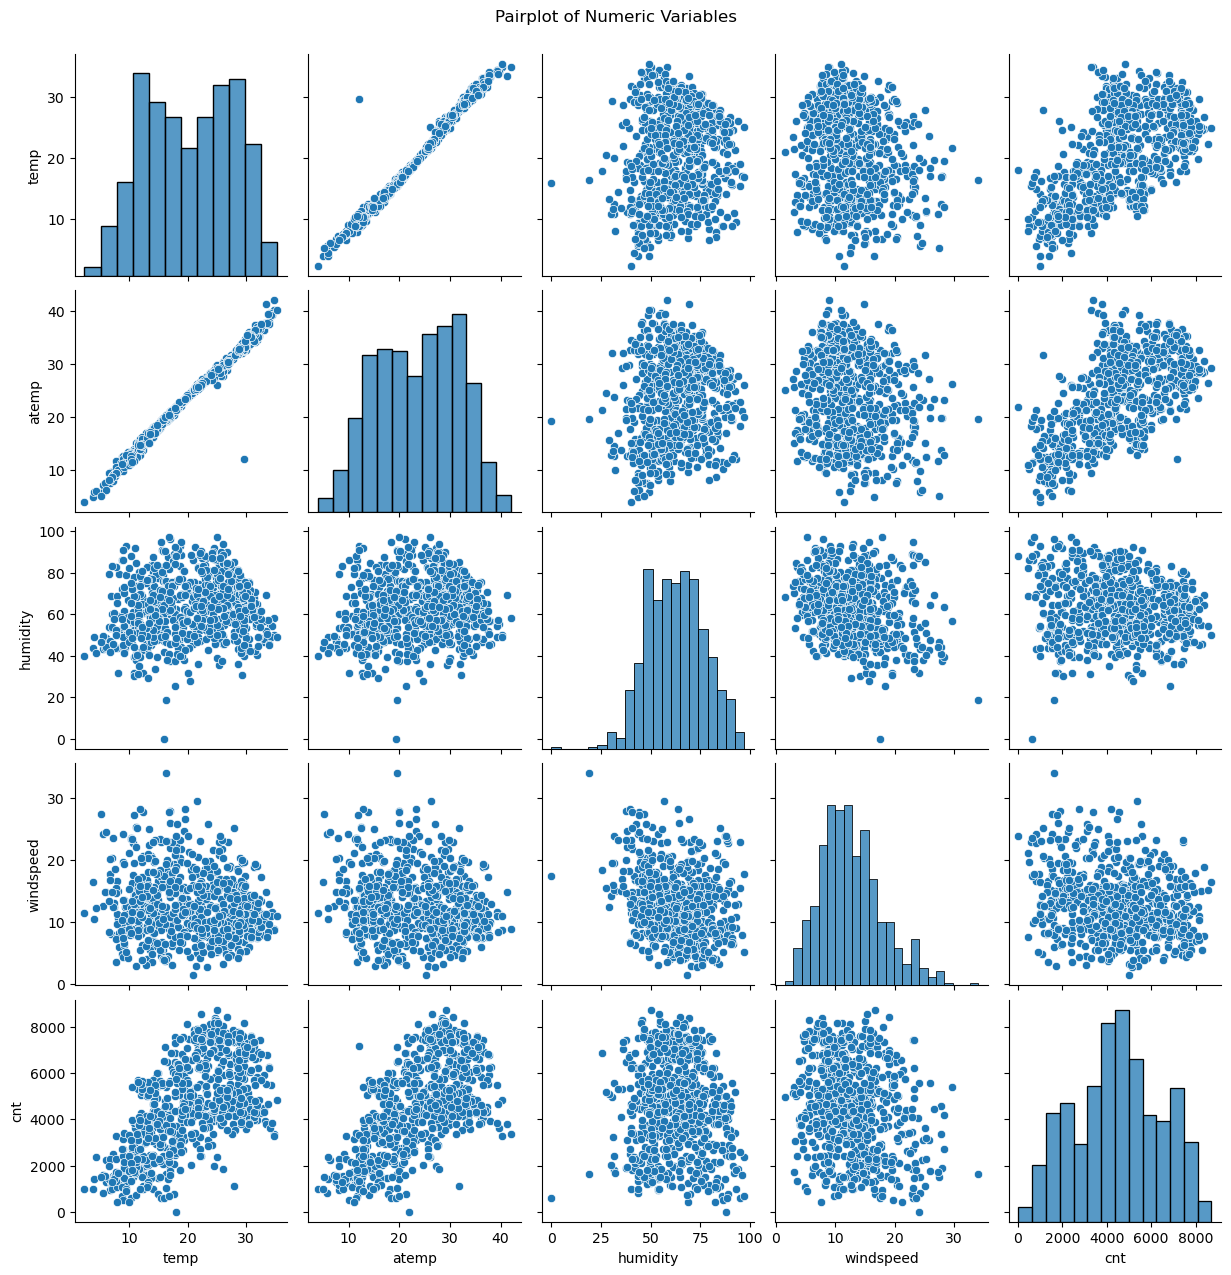

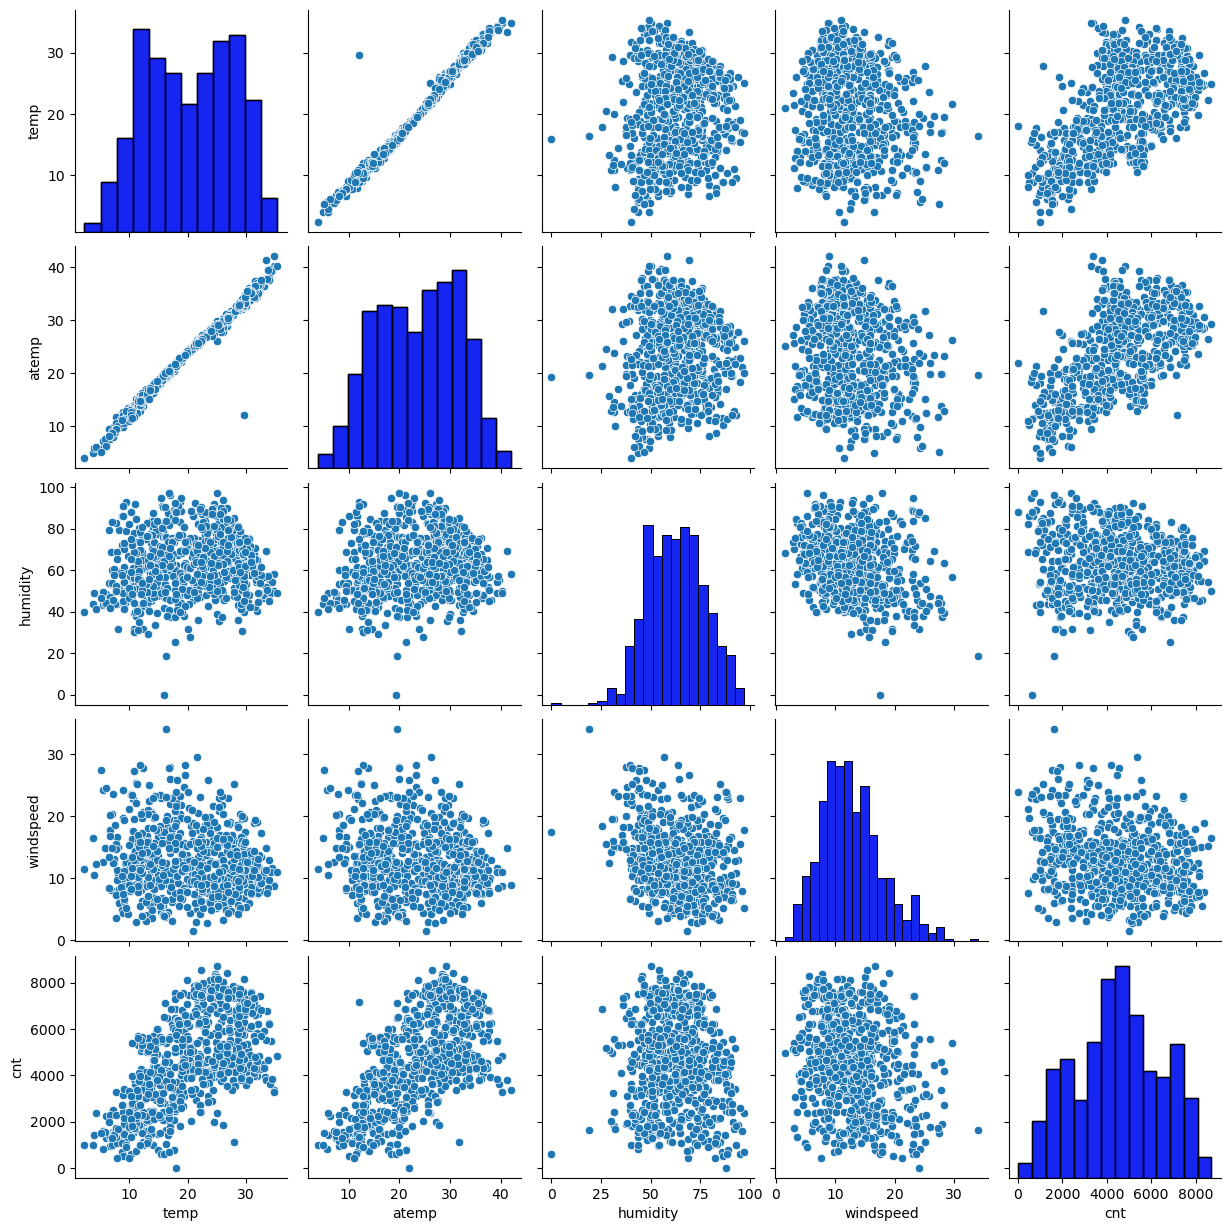

In [135]:

num = ['temp','atemp','humidity','windspeed','cnt']
sns.pairplot(df, vars=num)

plt.suptitle('Pairplot of Numeric Variables', y=1.02)  # Add a title above the pairplot
pairplot = sns.pairplot(df, vars=num)
pairplot.map_diag(sns.histplot, color='blue', edgecolor='black') plt.show()

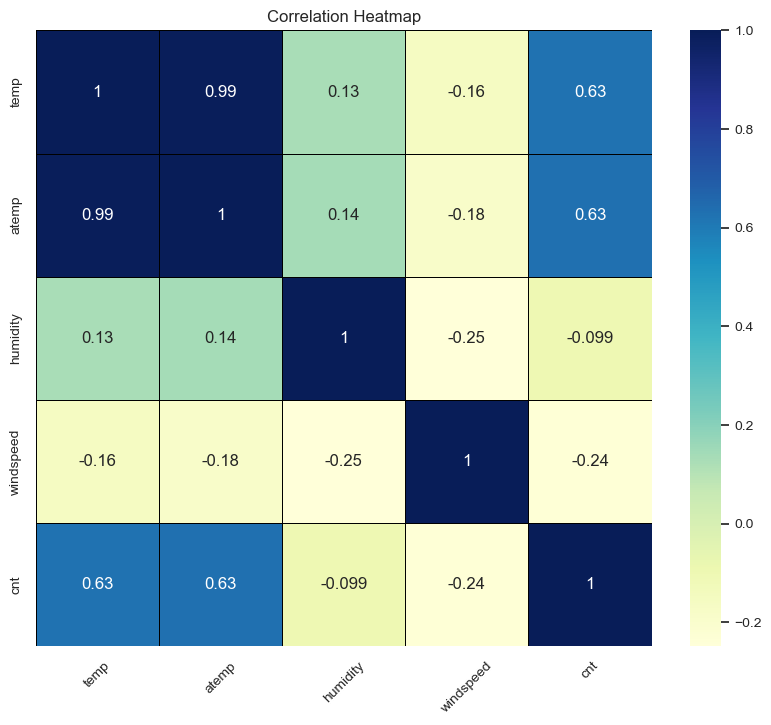

In [148]:
# correlation between different variables Bivariate Analysis
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), cmap="YlGnBu", annot=True, linewidths=0.5, linecolor='black', square=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title("Correlation Heatmap")
plt.show()

There is linear relationship between temp(1) and atemp(0.99). Both cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value 

## 2. Preparing Data Modelling ( train-test split , Rescalling etc)

In [297]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [298]:
# Creating Dummy variable for month, weekday, weathersit and season.
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [299]:
# concatenating dataframes to new dataframe df_new
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)


In [300]:
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [301]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [302]:
# train test model import libraries
from sklearn.model_selection import train_test_split

In [303]:
# train 70 % and test 30%
df_train, df_test = train_test_split(df_new, train_size = 0.7,test_size= 0.3 ,random_state = 100)

In [304]:
df_new.shape

(730, 30)

In [305]:
# 70% of df_new is 510
df_train.shape

(510, 30)

In [306]:
# 30% of df_new is 219
df_test.shape

(219, 30)

In [307]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0


In [314]:
from sklearn.preprocessing import MinMaxScaler

In [317]:
# rescalling features
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [319]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


## 3. Train the Models

In [320]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [321]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [322]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [323]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [324]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [281]:
#list of Train Columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 9),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 8),
 ('nov', False, 4),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 16),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [325]:
# selecting the selected variable via RFE in col list
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')

In [326]:
# selecting the Rejected variable via RFE in col list
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [284]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [285]:
# Generic function to calculate VIF of variables

def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [327]:
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')

In [328]:
X_train[col]

,year,holiday,workingday,temp,humidity,windspeed,july,sep,sat,sun,Light_snowrain,Misty,spring,winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,0,0,0,0,1,0,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,1,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,1


In [329]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [330]:
getVIF(X_train_rfe)

,Features,VIF
2,workingday,40.71
8,sat,9.93
9,sun,9.64
3,temp,2.99
12,spring,2.55
1,holiday,2.54
4,humidity,1.89
13,winter,1.78
11,Misty,1.57
6,july,1.30


workingday high VIF

## Building Multi Linear Regression Model

In [331]:
import statsmodels.api as sm

In [335]:
# Building 1st linear regression modela

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.81e-190
Time:                        13:28:05   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2418      0.025      9.

In [336]:
 # As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
3,humidity,22.65
2,temp,15.30
4,windspeed,4.06
11,spring,2.55
10,Misty,2.25
12,winter,2.10
0,year,2.06
5,july,1.40
7,sat,1.23
8,sun,1.23


humidity shows high VIF

In [337]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.81e-190
Time:                        13:29:42   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3364      0.031     10.

In [338]:
 # As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,temp,4.73
3,windspeed,4.04
0,year,2.06
10,spring,1.68
9,Misty,1.52
11,winter,1.43
4,july,1.35
6,sat,1.23
7,sun,1.21
5,sep,1.20


In [339]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.38e-188
Time:                        13:30:55   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2575      0.024     10.

In [340]:
X_train_new

,year,holiday,temp,windspeed,july,sep,sat,sun,Light_snowrain,Misty,spring,winter
653,1,0,0.509887,0.300794,0,0,0,0,0,0,0,1
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,1,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,1,0,0,1,0
482,1,0,0.395666,0.188475,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,0,0,0,0,1,0,0
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0,0,1,0
350,0,0,0.248216,0.431816,0,0,1,0,0,1,0,1


In [341]:
 # As sat shows high P-value hence we can drop it
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


In [342]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.60e-189
Time:                        13:35:32   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     498   BIC:                            -931.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2597      0.024     10.

We can cosider the above model i.e lr_4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

F-Statistics value of 234.8 (which is greater than 1) and the p-value of 4.60e-189  i.e almost equals to zero, states that the overall model is significant

In [343]:
# checking params
lr_4.params

const             0.259689
year              0.233994
holiday          -0.106196
temp              0.450163
windspeed        -0.139560
july             -0.070388
sep               0.056442
sun              -0.047864
Light_snowrain   -0.291625
Misty            -0.083073
spring           -0.110222
winter            0.049373
dtype: float64

# 4. Residual Analysis

In [345]:
X_train_lm_4

,const,year,holiday,temp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,1,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,1,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,1,0,1


In [346]:
y_train_pred = lr_4.predict(X_train_lm_4)

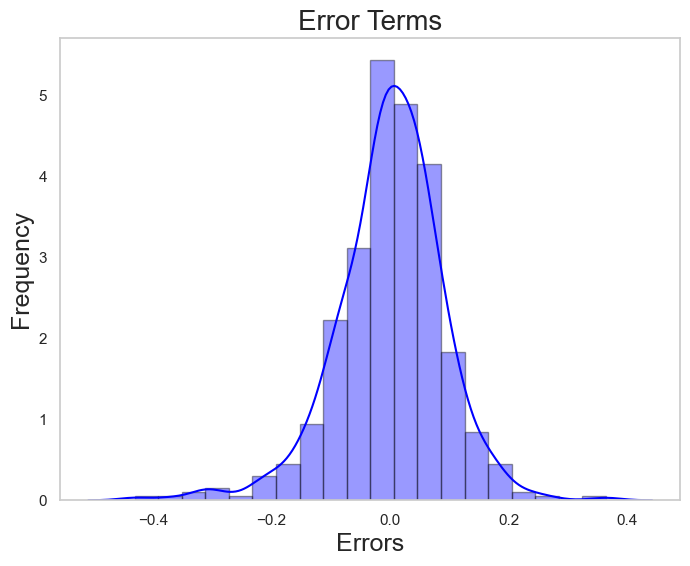

In [348]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8, 6))
# Create a distribution plot of the errors
sns.distplot((y_train - y_train_pred), bins=20, hist_kws={'edgecolor': 'black'}, color='blue')
# Add a title
plt.title('Error Terms', fontsize=20)
# Label the axes
plt.xlabel('Errors', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
# Add grid lines
plt.grid()
# Show the plot
plt.show()


Error Terms are normally distributed

In [350]:
getVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


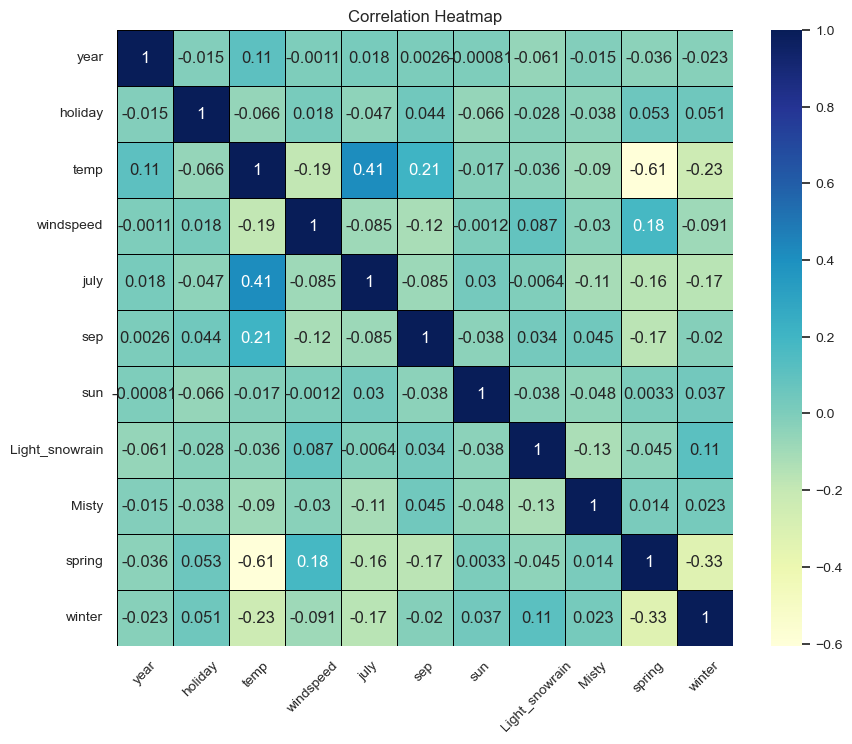

In [351]:
# correlation between different variables Bivariate Analysis
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(X_train_new.corr(), cmap="YlGnBu", annot=True, linewidths=0.5, linecolor='black', square=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title("Correlation Heatmap")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

## Applying scaling on the test dataset


In [354]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [355]:
y_test = df_test.pop('cnt')
X_test = df_test

In [356]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [358]:
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [359]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [360]:
y_pred = lr_4.predict(X_test_lm_4)

In [362]:
from sklearn.metrics import r2_score


## $ Calculate_r2$

In [363]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8097

Text(0, 0.5, 'y_pred')

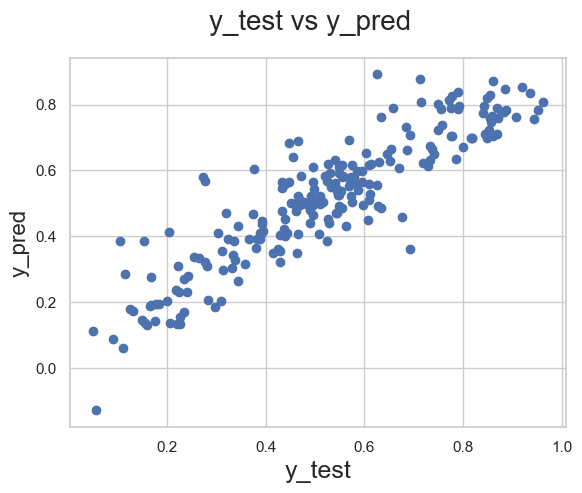

In [364]:
# Model Evaluation (predict value for actual and predicted values)
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [365]:
round(lr_4.params,4)

const             0.2597
year              0.2340
holiday          -0.1062
temp              0.4502
windspeed        -0.1396
july             -0.0704
sep               0.0564
sun              -0.0479
Light_snowrain   -0.2916
Misty            -0.0831
spring           -0.1102
winter            0.0494
dtype: float64

We can see that the equation of our best fitted line is:

$ count  =  0.2597 + (0.2340 * year ) + (- 0.1062 * holiday) + (0.4502 * temp) + (- 0.1396 * windspeed) 
        + (-0.0704 * july) + (0.0564 * sep) + (-0.0479 * sun) + (-0.2916 * Light_snowrain) + (-0.0831 * Misty)
        + (-0.1102 * spring) + (0.0494 * winter) $

In [367]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7996


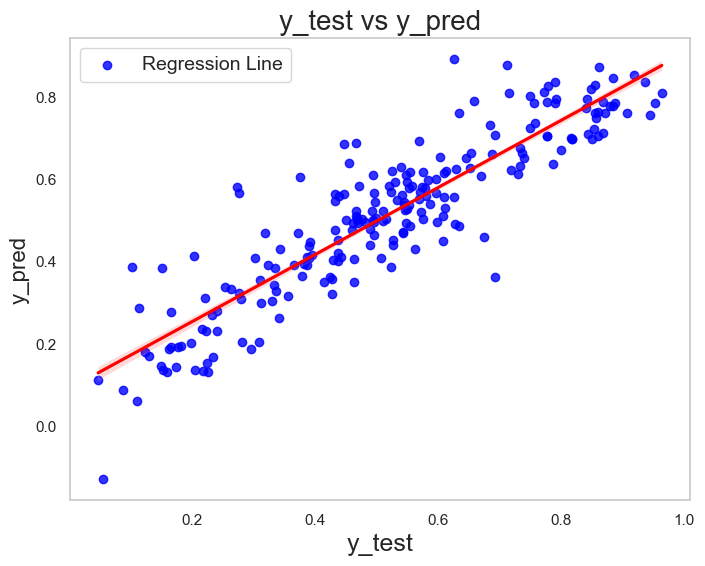

In [372]:
# Visualizing the fit on the test data
# plotting a Regression plot

# Create a figure
plt.figure(figsize=(8, 6))
# Create a regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# Add a title
plt.title('y_test vs y_pred', fontsize=20)
# Label the axes
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# Add a legend
plt.legend(labels=["Regression Line"], loc="best", fontsize=14)

# Add grid lines
plt.grid()

# Show the plot
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.838
    - Test dataset R^2           : 0.8097
    - Train dataset Adjusted R^2 : 0.825 
    - Test dataset Adjusted R^2  : 0.7996
#### Demand of bikes depend on year, holiday, temp, windspeed,july, sep,sun, Light_snowrain, Misty, spring and winter.